In [1]:
import os
from tensorflow import keras

## Start Creat With Opencv:
## Edge_Canny:

In [2]:
path = 'Modified_Dataset/Train/'

In [3]:
class_name = os.listdir(path)

In [4]:
import matplotlib.pyplot as plt
from skimage import io, color
from skimage.transform import rescale, resize, downscale_local_mean
import numpy as np
from skimage import feature

In [5]:
x = []
y = []
for label in class_name:
    dir = os.path.join(path, label) + '/'
    #print(path_img)
    current_label = label
    for path_image in os.listdir(dir):
        #print(path_image)
        image_path = os.path.join(dir, path_image)
        #print(image_path)
        img = io.imread(image_path)
        #print(np.shape(img))
        #img_rescaled = rescale(img, 1.0 / 2.0, anti_aliasing=False)
        edge_canny = feature.canny(img, sigma=0.95)
        x.append(edge_canny)
        y.append(current_label)

In [6]:
np.unique(edge_canny, return_counts=True)

(array([False,  True]), array([32929,  1581], dtype=int64))

In [7]:
x = np.array(x)
x = x.astype('uint8')

In [8]:
x.shape

(1050, 170, 203)

In [9]:
y = np.array(y)
y.shape

(1050,)

In [10]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
y = lb.fit_transform(y)

In [11]:
np.unique(y, return_counts=True)

(array([0, 1, 2], dtype=int64), array([350, 350, 350], dtype=int64))

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 1369)

In [60]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = (170, 203)))
model.add(keras.layers.Dense(8, activation = 'elu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(5, activation = 'elu'))
model.add(keras.layers.Dense(3, activation = 'softmax'))

In [61]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 34510)             0         
_________________________________________________________________
dense_21 (Dense)             (None, 8)                 276088    
_________________________________________________________________
dropout_7 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_22 (Dense)             (None, 5)                 45        
_________________________________________________________________
dense_23 (Dense)             (None, 3)                 18        
Total params: 276,151
Trainable params: 276,151
Non-trainable params: 0
_________________________________________________________________


In [46]:
early = keras.callbacks.EarlyStopping()

In [62]:
model.compile(loss='sparse_categorical_crossentropy', optimizer = 'adam', metrics='accuracy')

In [63]:
result = model.fit(x_train, y_train, batch_size=13, epochs=100 ,validation_data=(x_test, y_test), callbacks=[early])

Epoch 1/100
61/61 [==============================] - 0s 7ms/step - loss: 0.7764 - accuracy: 0.6633 - val_loss: 0.3622 - val_accuracy: 0.9696
Epoch 2/100
61/61 [==============================] - 0s 4ms/step - loss: 0.4081 - accuracy: 0.8856 - val_loss: 0.2042 - val_accuracy: 0.9924
Epoch 3/100
61/61 [==============================] - 0s 4ms/step - loss: 0.2857 - accuracy: 0.9352 - val_loss: 0.1282 - val_accuracy: 0.9962
Epoch 4/100
61/61 [==============================] - 0s 4ms/step - loss: 0.1914 - accuracy: 0.9593 - val_loss: 0.0911 - val_accuracy: 0.9962
Epoch 5/100
61/61 [==============================] - 0s 4ms/step - loss: 0.1685 - accuracy: 0.9555 - val_loss: 0.0733 - val_accuracy: 0.9962
Epoch 6/100
61/61 [==============================] - 0s 4ms/step - loss: 0.1374 - accuracy: 0.9682 - val_loss: 0.0615 - val_accuracy: 0.9924
Epoch 7/100
61/61 [==============================] - 0s 5ms/step - loss: 0.1105 - accuracy: 0.9720 - val_loss: 0.0482 - val_accuracy: 0.9962
Epoch 8/100
6

<AxesSubplot:>

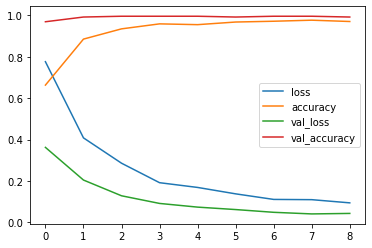

In [64]:
import pandas as pd
pd.DataFrame(result.history).plot()

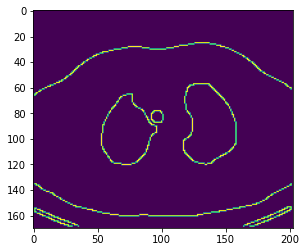

In [65]:
plt.imshow(x_train[0])

In [21]:
preditc = model.predict(x_test)

In [70]:
predict_class = np.argmax(preditc, axis = 1)

Text(0.5, 1.0, '1')

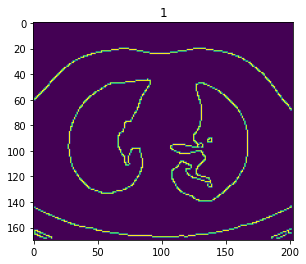

In [72]:
plt.imshow(x_test[10])
plt.title(y_test[10])

In [73]:
predict_class[10]

1

Text(0.5, 1.0, '2')

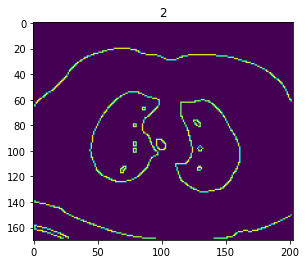

In [74]:
plt.imshow(x_test[250])
plt.title(y_test[250])

In [76]:
predict_class[250]

2